In [1]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import to_agraph 
from matplotlib import cm
import matplotlib.font_manager as fm

In [2]:
f = open('/content/drive/MyDrive/sample.txt', 'r', encoding='utf-8')
lines = f.readlines()
print(lines)

["'롤러블' '디스플레이' '탑재' '갤럭시워치' '예상' '렌더링' '이미지'\n", "'레츠고디지털' '캡쳐차세대' '스마트폰' '폼팩터' '특정' '기기형태' '롤러블폰' '롤러블' '디스플레이' '스마트워치' '출시'\n", "'정보기술' 'IT' '매체' '렛츠고디지털' '삼성전자' '세계지식재산기구' 'WIPO' '롤러블' '디스플레이'\n"]


In [3]:
! pip install konlpy
from konlpy.tag import Hannanum
hannanum = Hannanum()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
dataset = []
for i in range(len(lines)):
  dataset.append(Hannanum().nouns(re.sub('[^가-힣a-zA-Z\s]', '', lines[i])))
dataset[:3]

[['롤러블', '디스플레이', '탑재', '갤럭시워치', '예상', '렌더링', '이미'],
 ['레츠고디지털',
  '캡쳐차세대',
  '스마트폰',
  '폼팩터',
  '특정',
  '기기형태',
  '롤러블폰',
  '롤러블',
  '디스플레이',
  '스마트워치',
  '출시'],
 ['정보기술', '매체', '렛츠고디지털', '삼성전자', '세계지식재산기구', '롤러블', '디스플레이']]

In [5]:
!pip install apyori
from apyori import apriori
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2) &
        (df['support']>= 0.01)].sort_values(by='support', ascending=False)
df.head(5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,items,support,ordered_statistics,length
40,"(디스플레이, 롤러블)",1.000000,"[((), (디스플레이, 롤러블), 1.0, 1.0), ((디스플레이), (롤러블)...",2
21,"(디스플레이, 갤럭시워치)",0.333333,"[((), (디스플레이, 갤럭시워치), 0.3333333333333333, 1.0)...",2
92,"(매체, 삼성전자)",0.333333,"[((), (매체, 삼성전자), 0.3333333333333333, 1.0), ((...",2
90,"(특정, 롤러블폰)",0.333333,"[((), (특정, 롤러블폰), 0.3333333333333333, 1.0), ((...",2
89,"(캡쳐차세대, 롤러블폰)",0.333333,"[((), (롤러블폰, 캡쳐차세대), 0.3333333333333333, 1.0),...",2


In [6]:
#네트워크 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

In [7]:
#페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))


In [8]:
pos = nx.circular_layout(G)
G.nodes()

NodeView(('디스플레이', '롤러블', '갤럭시워치', '매체', '삼성전자', '특정', '롤러블폰', '캡쳐차세대', '출시', '스마트폰', '스마트워치', '폼팩터', '탑재', '정보기술', '이미', '예상', '세계지식재산기구', '렛츠고디지털', '렌더링', '기기형태', '레츠고디지털'))

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

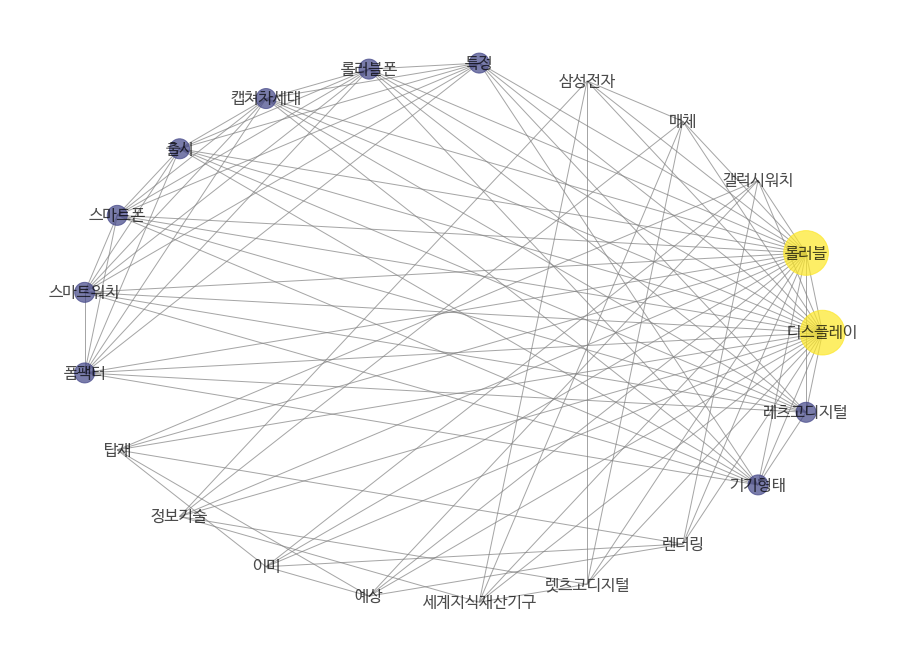

In [10]:
#네트워크 그래프
from networkx.drawing.nx_agraph import to_agraph 
plt.figure(figsize=(16,12)); plt.axis('off')

nx.draw(G, with_labels=True, pos = pos, font_family = 'NanumBarunGothic', font_size=16
        ,node_color=list(pr.values()), node_size=nsize,
                alpha=0.7, edge_color='.5')
plt.show()
#plt.savefig('Network.png', bbox_inches='tight')